# About
Here I want to explore different machine learning models for timeseries prediction. I use a real timeseries dataset that I found on from [Kaggle](www.kaggle.com).

I worked on this while taking the [DeepLearning.AI course "Sequences, Time Series and Prediction"](https://www.coursera.org/learn/tensorflow-sequences-time-series-and-prediction).

## Concepts covered
* Univariate timeseries
* Deep neural networks
* Recurrent neural networks (RNN)
* LSTM (Long short-term Memory) models
* Multilayer perceptron (MLP) model
* Convolutional layers

## Tools used
* Tensorfow: `tf.data.Dataset`, `tf.keras.Sequential`
* Kaggle API
* Pandas

# Imports, setup

In [156]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from kaggle.api.kaggle_api_extended import KaggleApi
import seaborn as sns

## Download data from Kaggle
This step requires using the [Kaggle API](https://github.com/Kaggle/kaggle-api) and authenticating using the API credentials. In order to focus on model concepts rather than digging into the data, I pick a well-studied dataset: [monthly sunspot activity](https://www.kaggle.com/robervalt/sunspots/activity). This is the most popular sunspot dataset on Kaggle.

In [157]:
api = KaggleApi()
try:
    api.authenticate()
except Exception as e:
    print("Kaggle authentication failed!")
    raise e

sunspot_datasets = api.datasets_list(search='sunspots')
sunspot_datasets.sort(key=lambda d: (d['voteCount'], d['viewCount']), reverse=True)

for d in sunspot_datasets:
    # d is a dict
    print(f"\"{d['title']}\": \n\t votes: {d['voteCount']}; views: {d['viewCount']}; {d['url']}")

"Sunspots": 
	 votes: 84; views: 23606; https://www.kaggle.com/robervalt/sunspots
"Daily Sun Spot Data (1818 to 2019)": 
	 votes: 22; views: 4416; https://www.kaggle.com/abhinand05/daily-sun-spot-data-1818-to-2019
"climate change": 
	 votes: 15; views: 7486; https://www.kaggle.com/econdata/climate-change
"NASA and NOAA  Satellites Solar-Wind Dataset": 
	 votes: 8; views: 844; https://www.kaggle.com/arashnic/soalr-wind
"RiseInTemp_dataset": 
	 votes: 6; views: 2403; https://www.kaggle.com/vageeshabudanur/riseintemp-dataset
"Monthly Sunspots": 
	 votes: 0; views: 212; https://www.kaggle.com/hugoherrera11/monthly-sunspots
"Sunspots": 
	 votes: 0; views: 95; https://www.kaggle.com/parichatapi/sunspots
"pyspark-library": 
	 votes: 0; views: 76; https://www.kaggle.com/rhtsingh/pysparklibrary


In [158]:
ref="robervalt/sunspots" 
datafiles = api.dataset_list_files(ref).files
print(f"Files in dataset \"{ref}\": {datafiles}")

# Download and unzip dataset into current directory
api.dataset_download_files(ref, unzip=True)
csv_file = str(datafiles[0])
!ls {csv_file}

Files in dataset "robervalt/sunspots": [Sunspots.csv]
Sunspots.csv


The dataset is a basic univariate timeseries, just dates and monthly sunspot numbers:

In [159]:
df = pd.read_csv(csv_file)
df.head()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


In [160]:
df = df.drop(columns=df.columns[0]).rename(
    columns={df.columns[1]: 'date', df.columns[2]: 'sunspots'})
df.date = pd.to_datetime(df.date)
print(df.head())

        date  sunspots
0 1749-01-31      96.7
1 1749-02-28     104.3
2 1749-03-31     116.7
3 1749-04-30      92.8
4 1749-05-31     141.7


In [161]:
# Assert that the timestamp differences are monthly: either +1 month or -11 (new year, Jan-Dec)
print(set(df.date.dt.month.diff()[1:].unique()) == {1, -11})

True


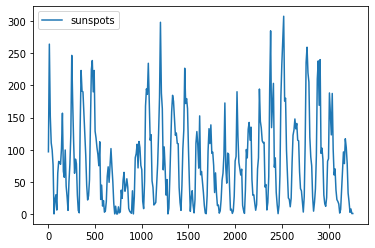

In [166]:
sns.lineplot(data=df[::10],);

In [167]:
len(df)

3265